In [1]:
pip install matplotlib umap-learn accelerate -U

Note: you may need to restart the kernel to use updated packages.


In [2]:
from datasets import load_dataset
import pandas as pd

In [3]:
emotions = load_dataset("emotion")
emotions

/opt/conda/lib/python3.10/site-packages/datasets/load.py:1461: FutureWarning: The repository for emotion contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/emotion
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [4]:
emotions["train"].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [5]:
emotions["train"][:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

In [6]:
emotions.set_format("pandas")

In [7]:
df = emotions["train"][:]

In [8]:
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [9]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

In [10]:
df["label_name"] = df["label"].apply(label_int2str)

In [11]:
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


<Axes: ylabel='label_name'>

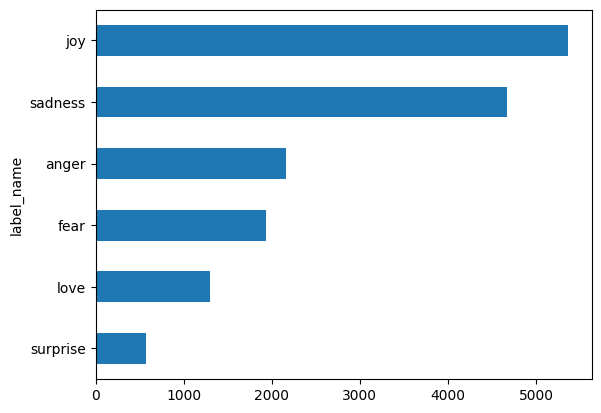

In [12]:
import matplotlib.pyplot as plt
df["label_name"].value_counts(ascending=True).plot.barh()

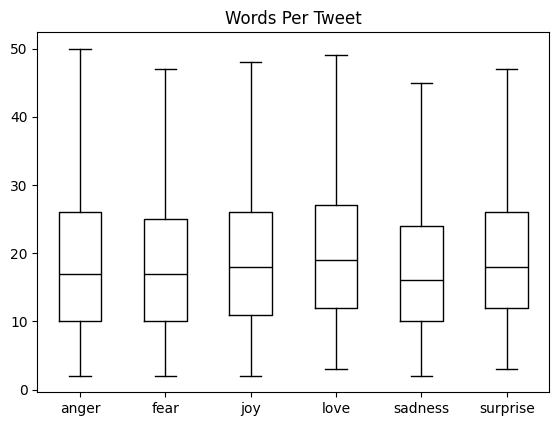

In [13]:
    df["Words Per Tweet"] = df["text"].str.split().apply(len)
    df.boxplot("Words Per Tweet", by="label_name", grid=False,
              showfliers=False, color="black")
    plt.suptitle("")
    plt.xlabel("")
    plt.show()

In [14]:
emotions.reset_format

<bound method DatasetDict.reset_format of DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})>

In [15]:
text = "Tokenizing text is a core task of NLP." 
tokenized_text = list(text) 
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


In [16]:
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}


In [17]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


In [18]:
categorical_df = pd.DataFrame({"Name": ["Bumblebee", "Optimus Prime", "Megatron"], "Label ID": [0,1,2]})
categorical_df

,Name,Label ID
0,Bumblebee,0
1,Optimus Prime,1
2,Megatron,2


In [19]:
pd.get_dummies(categorical_df["Name"])

,Bumblebee,Megatron,Optimus Prime
0,True,False,False
1,False,False,True
2,False,True,False


In [20]:
import torch
import torch.nn.functional as F
input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([38, 20])

In [21]:
from transformers import AutoTokenizer, AutoModel

In [22]:
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [23]:
encoded_text = tokenizer(text)
print(text)
print(encoded_text)

Tokenizing text is a core task of NLP.
{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [24]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


In [25]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp. [SEP]


In [26]:
tokenizer.vocab_size

30522

In [27]:
tokenizer.model_max_length

512

In [28]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

# Feature Extraction (Frozen model)

In [29]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

In [30]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 
model = AutoModel.from_pretrained(model_ckpt).to(device)

In [31]:
text = "this is a test"
inputs = tokenizer(text, return_tensors="pt") 
print(f"Input tensor shape: {inputs['input_ids'].size()}")

Input tensor shape: torch.Size([1, 6])


In [32]:
inputs = {k:v.to(device) for k,v in inputs.items()}
inputs

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]], device='cuda:0'),
 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]], device='cuda:0')}

In [33]:
with torch.no_grad():
    outputs = model(**inputs)
outputs.last_hidden_state.size()

torch.Size([1, 6, 768])

In [34]:
outputs.last_hidden_state[:,0].size()

torch.Size([1, 768])

In [35]:
def extract_hidden_states(batch):
    # Place model inputs on the GPU
    inputs = {k: v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
        # Return vector for [CLS] token
        return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [36]:
emotions.reset_format()
emotions_encoded = emotions.map(tokenize, batched=True)


Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [37]:
emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])

In [38]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [39]:
emotions_hidden["train"][0]

{'label': tensor(0),
 'input_ids': tensor([  101,  1045,  2134,  2102,  2514, 26608,   102,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0]),
 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'hidden_state': tensor([-1.1675e-01,  9.8571e-02, -1.2963e-01, -9.5018e-02, -2.8083e-01,
         -1.3222e-01,  2.2748e-01,  2.3100e-01,  1.6752e-01, -2.

In [40]:
emotions_hidden["train"].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None),
 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None),
 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None),
 'hidden_state': Sequence(feature=Value(dtype='float32', id=None), length=-1, id=None)}

In [41]:
import numpy as np

In [42]:
X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

In [43]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

In [44]:
# Scale features to [0,1] range
X_scaled = MinMaxScaler().fit_transform(X_train)
# Initialize and fit UMAP
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled) # Create a DataFrame of 2D embeddings
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"]) 
df_emb["label"] = y_train


In [45]:
print(df_emb.shape)
df_emb.head()

(16000, 3)


,X,Y,label
0,4.280095,6.147644,0
1,-3.046851,5.920546,0
2,5.224000,2.635912,3
3,-2.507310,3.632970,2
4,-3.581747,3.845044,3


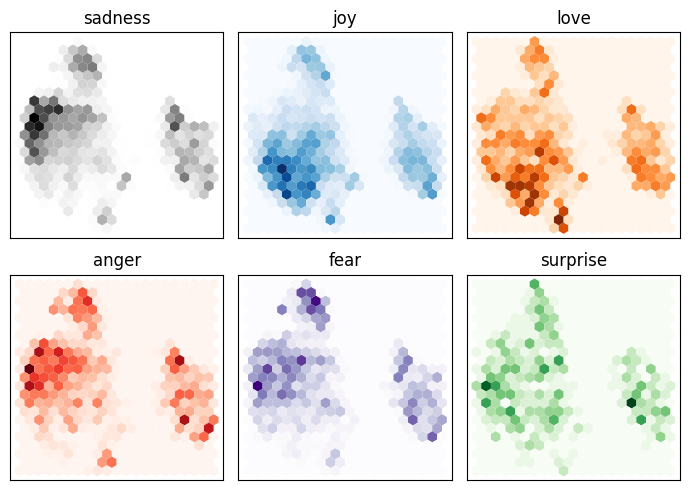

In [46]:
fig, axes = plt.subplots(2, 3, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions["train"].features["label"].names
for i, (label, cmap) in enumerate(zip(labels, cmaps)): 
    df_emb_sub = df_emb.query(f"label == {i}") 
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

In [47]:
from sklearn.linear_model import LogisticRegression

# We increase `max_iter` to guarantee convergence
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.6345

In [48]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

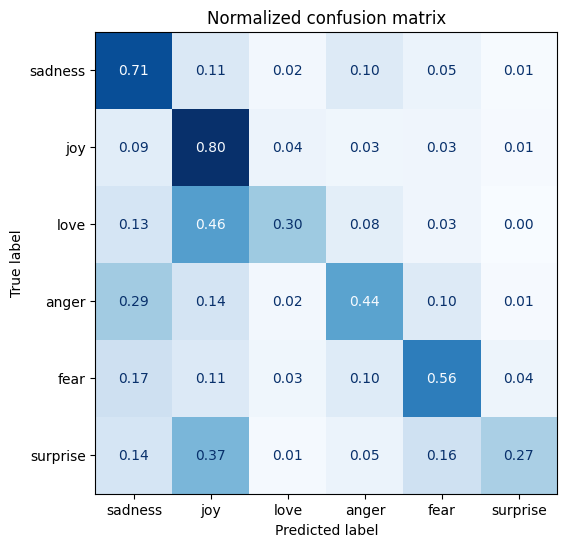

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels) 
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False) 
    plt.title("Normalized confusion matrix")
    plt.show()
    
y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

# Fine Tunning Entire Model

In [50]:
from transformers import AutoModelForSequenceClassification
num_labels = 6
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [51]:
from sklearn.metrics import accuracy_score, f1_score

In [52]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted") 
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [53]:
from transformers import Trainer, TrainingArguments

In [62]:
batch_size = 64
logging_steps = len(emotions_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                                      num_train_epochs=4,
                                      learning_rate=2e-5,
                                      per_device_train_batch_size=batch_size,
                                      per_device_eval_batch_size=batch_size,
                                      weight_decay=0.01,
                                      evaluation_strategy="epoch",
                                      disable_tqdm=False,
                                      logging_steps=logging_steps,
                                      log_level="error")

In [57]:
from transformers import Trainer

In [63]:
trainer = Trainer(model=model, 
                  args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded["train"],
                  eval_dataset=emotions_encoded["validation"],
                  tokenizer=tokenizer)

In [65]:
trainer.train();

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.144800,0.149869,0.932500,0.933048
2,0.101800,0.151954,0.935000,0.935596
3,0.081000,0.142592,0.939500,0.940124
4,0.064300,0.141411,0.940000,0.940001


In [66]:
preds_output = trainer.predict(emotions_encoded["validation"])

In [67]:
preds_output

PredictionOutput(predictions=array([[ 6.955618  , -1.3518543 , -2.0125453 , -1.2553844 , -1.7548426 ,
        -2.6155534 ],
       [ 6.948628  , -1.425177  , -2.6589355 , -0.9531063 , -1.5172201 ,
        -2.7481954 ],
       [-2.126598  ,  3.4928257 ,  4.3023295 , -1.9541047 , -3.3216095 ,
        -2.9915245 ],
       ...,
       [-1.276129  ,  6.9794183 , -0.73902667, -1.6673666 , -2.6478057 ,
        -2.3658495 ],
       [-2.3279953 ,  5.1481895 ,  2.8459582 , -1.9233246 , -3.4021635 ,
        -3.0188339 ],
       [-1.522749  ,  7.0279703 , -1.0985948 , -2.1986208 , -2.5464659 ,
        -1.5535539 ]], dtype=float32), label_ids=array([0, 0, 2, ..., 1, 1, 1]), metrics={'test_loss': 0.14141087234020233, 'test_accuracy': 0.94, 'test_f1': 0.9400012924997693, 'test_runtime': 0.4783, 'test_samples_per_second': 4181.828, 'test_steps_per_second': 66.909})

In [68]:
preds_output.metrics

{'test_loss': 0.14141087234020233,
 'test_accuracy': 0.94,
 'test_f1': 0.9400012924997693,
 'test_runtime': 0.4783,
 'test_samples_per_second': 4181.828,
 'test_steps_per_second': 66.909}

In [76]:
y_preds = np.argmax(preds_output.predictions, axis=1)
y_preds

array([0, 0, 2, ..., 1, 1, 1])

In [74]:
preds_output.predictions.argmax(-1)

array([0, 0, 2, ..., 1, 1, 1])

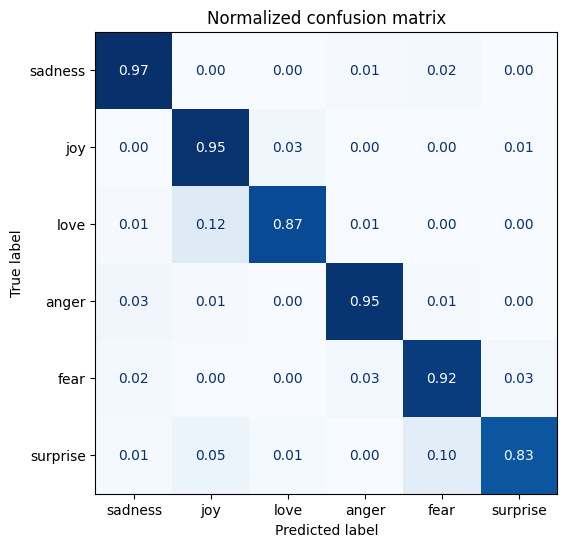

In [77]:
plot_confusion_matrix(y_preds, y_valid, labels)

# Looking deeper into classification predictions

In [78]:
from torch.nn.functional import cross_entropy

In [96]:
def forward_pass_with_label(batch):
    # Place all input tensors on the same device as the model
    inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
    with torch.no_grad():
        output = model(**inputs)
        pred_label = torch.argmax(output.logits, axis=-1)
        loss = cross_entropy(output.logits, batch["label"].to(device),reduction="none")
    # Place outputs on CPU for compatibility with other dataset columns
    return {"loss": loss.cpu().numpy(), "predicted_label": pred_label.cpu().numpy()}

In [98]:
    # Convert our dataset back to PyTorch tensors
emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])

In [104]:
emotions_encoded["validation"] = emotions_encoded["validation"].map(forward_pass_with_label, batched=True)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [105]:
emotions_encoded["validation"]

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask', 'loss', 'predicted_label'],
    num_rows: 2000
})

In [107]:
emotions_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = emotions_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = (df_test["predicted_label"].apply(label_int2str))

In [108]:
df_test

,text,label,predicted_label,loss
0,im feeling quite sad and sorry for myself but ...,sadness,sadness,0.000880
1,i feel like i am still looking at a blank canv...,sadness,sadness,0.000940
2,i feel like a faithful servant,love,love,0.371412
3,i am just feeling cranky and blue,anger,anger,0.001714
4,i can have for a treat or if i am feeling festive,joy,joy,0.000899
...,...,...,...,...
1995,im having ssa examination tomorrow in the morn...,sadness,sadness,0.001827
1996,i constantly worry about their fight against n...,joy,joy,0.000936
1997,i feel its important to share this info for th...,joy,joy,0.001033
1998,i truly feel that if you are passionate enough...,joy,joy,0.097062


In [140]:
sorted = df_test.sort_values("loss", ascending=False)
sorted.head(20)

,text,label,predicted_label,loss
1950,i as representative of everything thats wrong ...,surprise,sadness,8.284509
1111,im lazy my characters fall into categories of ...,joy,fear,7.038260
1195,i always think about are act the way i want to...,anger,joy,6.994898
1658,i said before i feel like a hypocrite advocati...,love,anger,6.535388
882,i feel badly about reneging on my commitment t...,love,sadness,6.403420
415,im kind of embarrassed about feeling that way ...,love,joy,5.869940
1801,i feel that he was being overshadowed by the s...,love,sadness,5.555266
1836,i got a very nasty electrical shock when i was...,fear,anger,4.979981
1124,someone acting stupid in public,anger,sadness,4.761114
259,when i noticed two spiders running on the floo...,anger,fear,4.721610


In [143]:
df_test["text"][882]

'i feel badly about reneging on my commitment to bring donuts to the faithful at holy family catholic church in columbus ohio'

In [141]:
df_test.sort_values("loss", ascending=True).head(10)

,text,label,predicted_label,loss
11,i was dribbling on mums coffee table looking o...,joy,joy,0.000715
1873,i feel practically virtuous this month i have ...,joy,joy,0.000723
1198,i feel like i should also mention that there w...,joy,joy,0.000725
1208,i feel brave again tubing were even going to t...,joy,joy,0.000730
1589,i feel a strong shift recently,joy,joy,0.000736
1263,i feel this way about blake lively,joy,joy,0.000740
1831,i zapper controls seemed to feel the most user...,joy,joy,0.000744
620,i shall move right along to the post interview...,joy,joy,0.000745
839,i feel very excited about the future of gaming...,joy,joy,0.000746
400,i are just relaxing together and i feel ecstat...,joy,joy,0.000747


In [142]:
df_test["text"][11]

'i was dribbling on mums coffee table looking out of the window and feeling very happy'

In [145]:
from huggingface_hub import notebook_login

In [146]:
notebook_login()

In [147]:
trainer.push_to_hub(commit_message="Training Completed")

training_args.bin:   0%|          | 0.00/4.92k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

CommitInfo(commit_url='https://huggingface.co/mwarchalowski/distilbert-base-uncased-finetuned-emotion/commit/fc30fcbd0afcfd3a4e917be0d49588dee5b47b70', commit_message='Training Completed', commit_description='', oid='fc30fcbd0afcfd3a4e917be0d49588dee5b47b70', pr_url=None, pr_revision=None, pr_num=None)

In [149]:
from transformers import pipeline

In [152]:
model_id = "mwarchalowski/distilbert-base-uncased-finetuned-emotion"
pipe = pipeline("text-classification", model=model_id)

In [155]:
custom_tweet = "I saw a movie today and it was really good."
preds = pipe(custom_tweet, top_k=None)

In [156]:
preds

[{'label': 'LABEL_1', 'score': 0.9962794184684753},
 {'label': 'LABEL_0', 'score': 0.0019075277959927917},
 {'label': 'LABEL_3', 'score': 0.001037794048897922},
 {'label': 'LABEL_2', 'score': 0.00034945987863466144},
 {'label': 'LABEL_5', 'score': 0.00024116685381159186},
 {'label': 'LABEL_4', 'score': 0.00018468381313141435}]

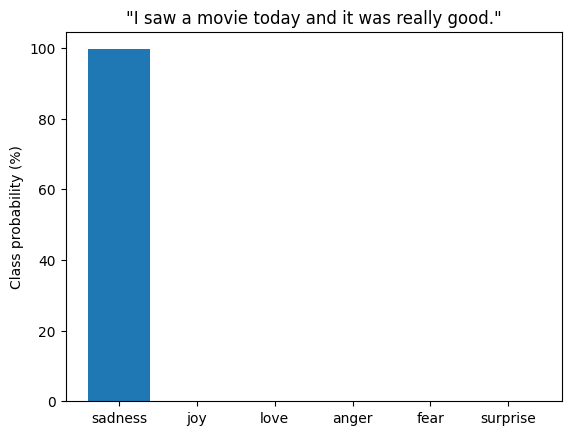

In [168]:
preds_df = pd.DataFrame(preds)
plt.bar(labels, 100 * preds_df["score"], color='C0')
plt.title(f'"{custom_tweet}"')
plt.ylabel("Class probability (%)")
plt.show()

In [167]:
preds_df

,label,score
0,LABEL_1,0.996279
1,LABEL_0,0.001908
2,LABEL_3,0.001038
3,LABEL_2,0.000349
4,LABEL_5,0.000241
5,LABEL_4,0.000185
